# A Simple Tutorial Dimensionality Reduction Techniques


## Introduction

Have you ever worked on a dataset with more than a thousand features? How about over 50,000 features? I have, and let me tell you this. It is a very challenging task, especially if you don’t know where to start! Having a high number of variables is both a boon and a curse. It’s great that we have loads of data for analysis, but it is challenging due to size.

It’s not feasible to analyze each and every variable at a microscopic level. It might take us days or months to perform any meaningful analysis and we’ll lose a ton of time and money for our business! Not to mention the amount of computational power this will take. We need a better way to deal with high dimensional data so that we can quickly extract patterns and insights from it. So how do we approach such a dataset?

Using dimensionality reduction techniques, of course we can reduce the number of features in the dataset without having to lose much information and keep /improve the model’s performance. It’s a really powerful way to deal with huge datasets.

This is a comprehensive tutorial covering various dimensionality reduction techniques that can be used in practical scenarios. We will first understand what this concept is and why we should use it, before diving into the different techniques I have covered. Each technique has it’s own implementation in Python which you will get acquainted with it.

## Table of Contents

-  1.0 What is Dimensionality Reduction?
-  2.0 Why is Dimensionality Reduction required?
-  3.0 Summary Overview
-  3.1 Feature Selection
    - Missing Value Ratio
    - Low Variance Filter
    - High Correlation Filter
    - Random Forest
    - Backward Feature Elimination/Recursive Feature Elimination(RFE)
    - Forward Feature Selection
-  3.2 Dimensionality Reduction
    - 3.2.1 Components/Factor Based
        - Factor Analysis
        - Principal Component Analysis(PCA)
        - Singular Value Decomposition(SVD)
        - Independent Component Analysis(ICA)
    -  3.2.2 Projections Based
        - ISOMAP
        - t-Distributed Stochastic Neighbor Embedding (t-SNE)
        - Uniform Manifold Approximation and Projection (UMAP) 

-  3.3 Applications of Various Dimensionality Reduction Techniques

### 1.0 What is Dimensionality Reduction?

We are generating a tremendous amount of data daily. In fact, 90% of the data in the world has been generated in the last 3-4 years! The numbers are truly mind boggling. Below are just some of the examples of the kind of data being collected:

- Facebook collects data of what you like, share, post, places you visit, restaurants you like, etc.
- Your smartphone apps collect a lot of personal information about you
- Amazon collects data of what you buy, view, click, etc. on their site
- Casinos keep a track of every move each customer makes

As data generation and collection keeps increasing, visualizing it and drawing inferences becomes more and more challenging. One of the most common ways of doing visualization is through charts. Suppose we have 2 variables, Age and Height. We can use a scatter or line plot between Age and Height and visualize their relationship easily:

<img src="http://i67.tinypic.com/nfsns7.jpg">

Now consider a case in which we have, say 100 variables (p=100). In this case, we can have 100(100-1)/2 = 5000 different plots. It does not make much sense to visualize each of them separately, right? In such cases where we have a large number of variables, it is better to select a subset of these variables (p<<100) which captures as much information as the original set of variables.

Let us understand this with a simple example. Consider the below image:

<img src="http://i63.tinypic.com/10gd6rs.jpg">

Here we have weights of similar objects in Kg (X1) and Pound (X2). If we use both of these variables, they will convey similar information. So, it would make sense to use only one variable. We can convert the data from 2D (X1 and X2) to 1D (Y1) as shown below:

<img src="http://i63.tinypic.com/4igg7q.jpg">


Similarly, we can reduce p dimensions of the data into a subset of k dimensions (k<<n). This is called dimensionality reduction.

### 2.0 Why is Dimensionality Reduction required?

Here are some of the benefits of applying dimensionality reduction to a dataset:

- Space required to store the data is reduced as the number of dimensions comes down.
- Less dimensions lead to less computation/training time.
- Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful.
- It takes care of multicollinearity by removing redundant features. For example, you have two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require
- It helps in visualizing data. As discussed earlier, it is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

Time to dive into the crux of this tutorial – the various dimensionality reduction techniques! We will be using the dataset from https://www.kaggle.com/c/home-credit-default-risk/data


### 3.0   Summary Overview

It’s important to understand where you can, and should, use a certain technique as it helps save time, effort and computational power. 

Dimensionality reduction can be done in two different ways:

#### Feature Selection

- By only keeping the most relevant variables from the original dataset (this technique is called <b>feature selection)

- **Missing Value Ratio: **

If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them.

- **Low Variance filter: **

We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can safely be dropped.

- **High Correlation filter:**

A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop one of them accordingly.

- **Random Forest: **

This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction.

- #### Backward Feature Elimination & Forward Feature Selection:

Both take a lot of computational time and are thus generally used on smaller datasets

#### Dimensionality Reduction:

- By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (this technique is called <b>dimensionality reduction</b>.)

- **Factor Analysis: **

This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor.

- **Principal Component Analysis(PCA):**

This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible.

- **Independent Component Analysis(ICA): **

We can use ICA to transform the data into independent components which describe the data using less number of components.

- **ISOMAP:** 

We use this technique when the data is strongly non-linear

- **t-SNE: **

This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well.

- **UMAP: **

This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE

We will now look at various dimensionality reduction techniques and how to implement each of them in Python.

### 3.1 Feature Selection

##### Missing Value Ratio

Suppose you’re given a dataset. What would be your first step? You would naturally want to explore the data first before building model. While exploring the data, you find that your dataset has some missing values. Now what? You will try to find out the reason for these missing values and then impute them or drop the variables entirely which have missing values (using appropriate methods).

What if we have too many missing values (say more than 50%)? Should we impute the missing values or drop the variable? I would prefer to drop the variable since it will not have much information. However, this isn’t set in stone. We can set a threshold value and if the percentage of missing values in any variable is more than that threshold, we will drop the variable.

Let’s implement this approach in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let’s load the data:

In [2]:
train=pd.read_csv("../input/home-credit-default-risk/application_train.csv")

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Note: The path of the file should be added while reading the data.
Now, we will check the percentage of missing values in each variable. We can use .isnull().sum() to calculate this.

In [4]:
missing_values = train.isnull().sum()/len(train)*100
missing_values[missing_values>0].sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

As you can see in the above table, there are too many missing values . We can impute the values using appropriate methods, or we can set a threshold of, say 60%, and remove the variable having more than 60% missing values. Let’s look at how this can be done in Python:

In [5]:
# Saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,122):
    if a[i]>=60:   #setting the threshold as 60%
        variable.append(variables[i])

So the variables to be used are stored in “variable”, which contains only those features where the missing values are less than 60% as shown below

In [6]:
variable

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

**Low Variance Filter**


Consider a variable in our dataset where all the observations have the same value, say 1. If we use this variable, do you think it can improve the model we will build? The answer is no, because this variable will have zero variance.

So, we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this, as I mentioned above, is that variables with a low variance will not affect the target variable.

Let’s first impute the missing values in the train set using the mode value of the known observations. 

In [7]:
columns = train.columns
for col in columns:
    train[col].fillna(train[col].mode()[0],inplace = True)

Let’s check whether all the missing values have been filled:

In [8]:
train.isnull().sum()/len(train)*100

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION             0.0
DAYS_ID_PUBLISH               0.0
OWN_CAR_AGE                   0.0
FLAG_MOBIL                    0.0
FLAG_EMP_PHONE                0.0
FLAG_WORK_PHONE               0.0
FLAG_CONT_MOBILE              0.0
FLAG_PHONE                    0.0
FLAG_EMAIL                    0.0
OCCUPATION_TYPE               0.0
CNT_FAM_MEMBER

We are all set. Now let’s calculate the variance of all the numerical variables.

In [9]:
train.var().sort_values(ascending=True)

FLAG_MOBIL                      3.251916e-06
FLAG_DOCUMENT_12                6.503811e-06
FLAG_DOCUMENT_10                2.276297e-05
FLAG_DOCUMENT_2                 4.227326e-05
FLAG_DOCUMENT_4                 8.129156e-05
REGION_POPULATION_RELATIVE      1.913043e-04
FLAG_DOCUMENT_7                 1.918269e-04
FLAG_DOCUMENT_17                2.665869e-04
FLAG_DOCUMENT_21                3.348363e-04
FLAG_DOCUMENT_20                5.070432e-04
FLAG_DOCUMENT_19                5.947485e-04
NONLIVINGAPARTMENTS_MODE        6.684298e-04
NONLIVINGAPARTMENTS_MEDI        7.030735e-04
NONLIVINGAPARTMENTS_AVG         7.128752e-04
FLAG_DOCUMENT_15                1.208253e-03
YEARS_BEGINEXPLUATATION_AVG     1.818363e-03
YEARS_BEGINEXPLUATATION_MEDI    1.859404e-03
FLAG_CONT_MOBILE                1.863122e-03
COMMONAREA_MODE                 2.050846e-03
COMMONAREA_AVG                  2.160927e-03
YEARS_BEGINEXPLUATATION_MODE    2.160977e-03
COMMONAREA_MEDI                 2.165421e-03
NONLIVINGA

As the above output shows, the variance of some of the features 'FLAG_MOBIL','FLAG_DOCUMENT_12','FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', like are very less as compared to the other variables. We can safely drop these columns. This is how we apply low variance filter. Let’s implement this in Python:

In [10]:
numeric = train.select_dtypes(include=[np.number])
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=30:   #setting the threshold as 30%
       variable.append(numeric[i+1])

In [11]:
variable

['TARGET',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_2']

The above code gives us the list of variables that have a variance greater than 10.


**High Correlation Filter**

High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).

**As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.**

Let’s perform the correlation calculation in Python. We will drop the dependent variable (AMT_CREDIT) first and save the remaining variables in a new dataframe (df).

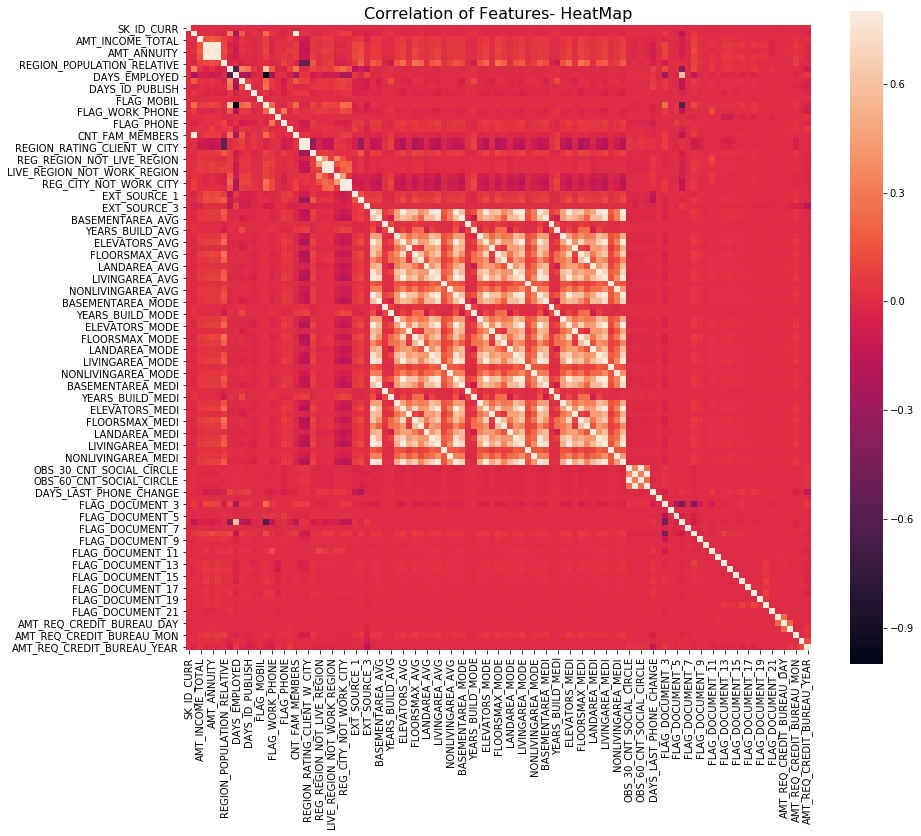

In [12]:
df=train.drop('TARGET', 1)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Features- HeatMap',y=1,size=16)
sns.heatmap(df.corr(),square = True,  vmax=0.8)

Wonderful, we do have some variables with a high correlation in our dataset. Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

**Random Forest**

Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features.

We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs. Let’s also drop the ID variables(SK_ID_CURR) as it is  just unique number and hold no significant importance for us currently.

In [13]:
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['SK_ID_CURR','DAYS_ID_PUBLISH'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.TARGET)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf='deprecated', min_samples_split=2,
           min_weight_fraction_leaf='deprecated', n_estimators=10,
           n_jobs=None, oob_score=False, random_state=1, verbose=0,
           warm_start=False)

After fitting the model, plot the feature importance graph:

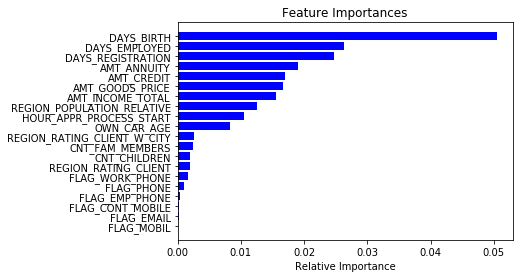

In [14]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances[0:20])  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the above graph, we can hand pick the top-most features to reduce the dimensionality in our dataset. Alernatively, we can use the SelectFromModel of sklearn to do so. It selects the features based on the importance of their weights.

In [15]:
from sklearn.feature_selection import SelectFromModel

feature = SelectFromModel(model)

Fit = feature.fit_transform(df, train.TARGET)

Fit.shape

(307511, 22)

As shown above the SelectFromModel has choosen top 22 important features for model building.

** Backward Feature Elimination / Recursive Feature Elimination (RFE)**

Follow the below steps to understand and use the ‘Backward Feature Elimination/Recursive Feature Elimination(RFE)’ technique:

- We first take all the n variables present in our dataset and train the model using them
- We then calculate the performance of the model
- Now, we compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables
- We identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable
- Repeat this process until no variable can be dropped
- This method can be used when building Linear Regression or Logistic Regression models. 

Let’s look at it’s Python implementation:

Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
F

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


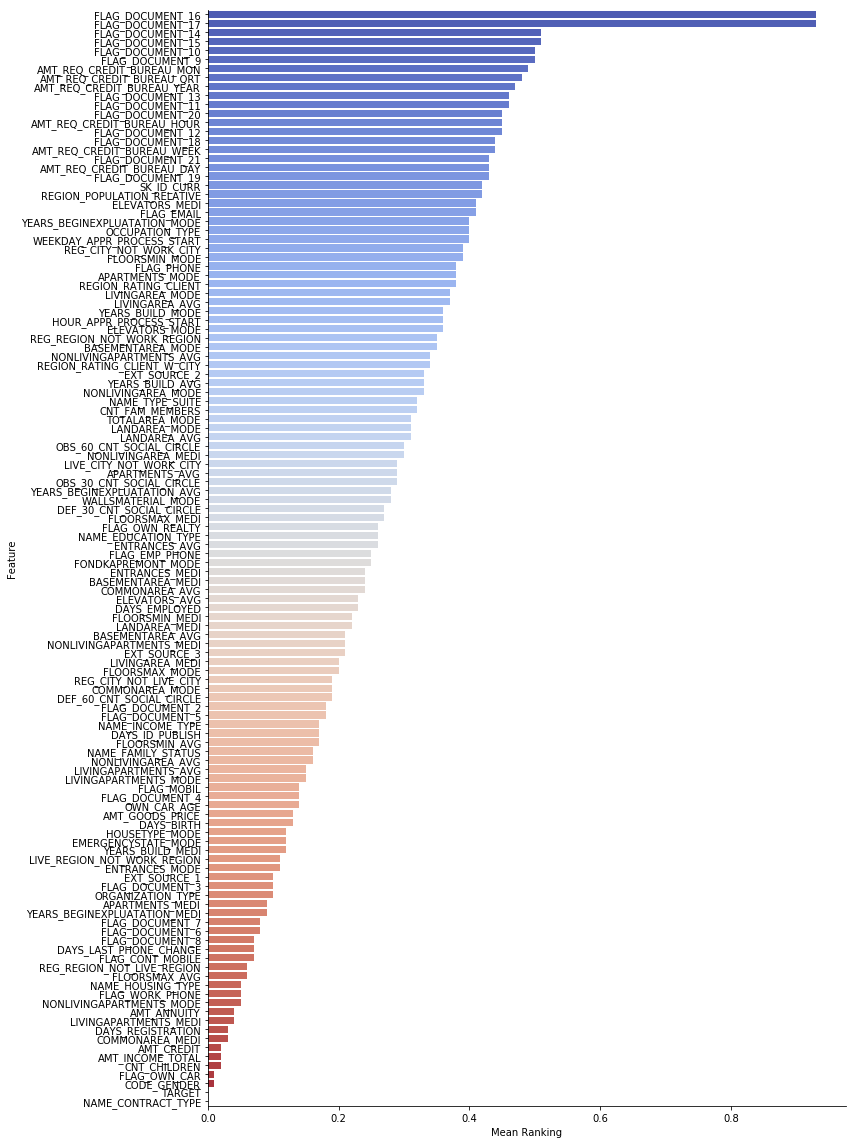

In [16]:
# Define dictionary to store our rankings

ranks = {}

# Create our function which stores the feature rankings to the ranks dictionary

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

# Construct our Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr = LinearRegression(normalize=True)
lr.fit(df, train.TARGET)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(df, train.TARGET)

from sklearn.preprocessing import MinMaxScaler
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), train.columns, order=-1)
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in train.columns:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])
# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar",size=16, aspect=0.75, palette='coolwarm')

We need to specify the algorithm and number of features to select, and we get back the list of variables obtained from backward feature elimination. We can also check the ranking of the variables using the “rfe.ranking_” command.

**Forward Feature Selection**

This is the opposite process of the Backward Feature Elimination we saw above. Instead of eliminating features, we try to find the best features which improve the performance of the model. This technique works as follows:

- We start with a single feature. Essentially, we train the model n number of times using each feature separately
- The variable giving the best performance is selected as the starting variable
- Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained
- We repeat this process until no significant improvement is seen in the model’s performance

Let’s implement it in Python:

In [17]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.TARGET)
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(df,train.TARGET)
for n,s in zip(train.columns,Selector_f.scores_):
    print ("F-score: %3.2f for feature %s " % (s,n))

F-score: 113.25 for feature SK_ID_CURR 
F-score: 4.88 for feature TARGET 
F-score: 283.88 for feature NAME_CONTRACT_TYPE 
F-score: 50.40 for feature CODE_GENDER 
F-score: 483.55 for feature FLAG_OWN_CAR 
F-score: 426.76 for feature FLAG_OWN_REALTY 
F-score: 1893.98 for feature CNT_CHILDREN 
F-score: 622.07 for feature AMT_INCOME_TOTAL 
F-score: 542.75 for feature AMT_CREDIT 
F-score: 49.03 for feature AMT_ANNUITY 
F-score: 0.09 for feature AMT_GOODS_PRICE 
F-score: 651.56 for feature NAME_TYPE_SUITE 
F-score: 250.40 for feature NAME_INCOME_TYPE 
F-score: 0.04 for feature NAME_EDUCATION_TYPE 
F-score: 174.38 for feature NAME_FAMILY_STATUS 
F-score: 0.95 for feature NAME_HOUSING_TYPE 
F-score: 26.65 for feature REGION_POPULATION_RELATIVE 
F-score: 1070.49 for feature DAYS_BIRTH 
F-score: 1144.46 for feature DAYS_EMPLOYED 
F-score: 179.69 for feature DAYS_REGISTRATION 
F-score: 9.56 for feature DAYS_ID_PUBLISH 
F-score: 14.82 for feature OWN_CAR_AGE 
F-score: 2.44 for feature FLAG_MOBIL 


This returns an array containing the F-values of the variables and the p-values corresponding to each F value. We will select the variables having F-value greater than 10:

In [18]:
variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df.columns[i])
variable

['CNT_CHILDREN',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI'

This gives us the top most variables based on the forward feature selection algorithm.

**NOTE : Both Backward Feature Elimination and Forward Feature Selection are time consuming and computationally expensive.They are practically only used on datasets that have a small number of input variables.**

The techniques we have seen so far are generally used when we do not have a very large number of variables in our dataset.These are more or less feature selection techniques.

### 3.2 Dimensionality Reduction

In the upcoming sections, we will be working with the Fashion MNIST dataset, which consists of images belonging to different types of apparel, e.g. T-shirt, trousers, bag, etc. The dataset can be downloaded from https://www.kaggle.com/zalando-research/fashionmnist

The dataset has a total of 70,000 images, out of which 60,000 are in the training set and the remaining 10,000 are test images. For the scope of this article, we will be working only on the training images. The train file contains 60,000 images. The corresponding label of each image can be found in the ‘fashion-mnist_train.csv’ file.

#### 3.2.1 Components/Factor Based

**Factor Analysis**

Suppose we have two variables: Income and Education. These variables will potentially have a high correlation as people with a higher education level tend to have significantly higher income, and vice versa.

In the Factor Analysis technique, variables are grouped by their correlations, i.e., all variables in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). Here, each group is known as a factor. These factors are small in number as compared to the original dimensions of the data. However, these factors are difficult to observe.

Let’s first read in all the images contained in the train folder:

In [19]:
train = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv",sep=',')

Now we will convert these images into a numpy array format so that we can perform mathematical operations and also plot the images and flatten the images.

In [20]:
train_data = np.array(train, dtype = 'float32')
image = []
for i in range(0,60000):
    img = train_data[i].flatten()
    image.append(img)
image = np.array(image)

Let us now create a dataframe containing the pixel values of every individual pixel present in each image, and also their corresponding labels (for labels, we will make use of the train.csv file).

In [21]:
train = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv",sep=',')    # Give the complete path of your train.csv file
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
df = pd.DataFrame(image,columns=feat_cols)
df['label'] = train['label']

Now we will decompose the dataset using Factor Analysis:

In [22]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components = 3).fit_transform(df[feat_cols].values)

Here, n_components will decide the number of factors in the transformed data. After transforming the data, it’s time to visualize the results:

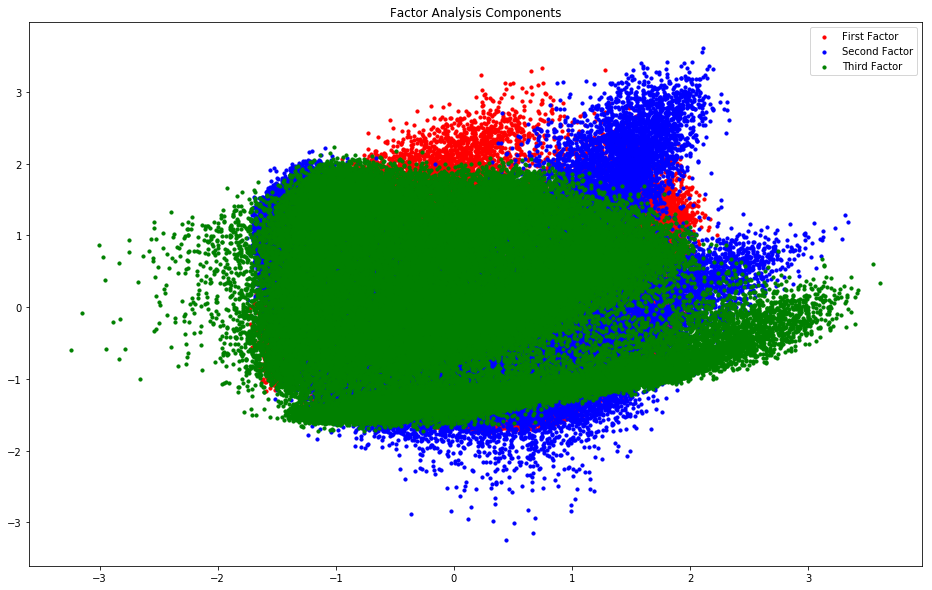

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.title('Factor Analysis Components')
plt.scatter(fa[:,0], fa[:,1],c='r',s=10)
plt.scatter(fa[:,1], fa[:,2],c='b',s=10)
plt.scatter(fa[:,2],fa[:,0],c='g',s=10)
plt.legend(("First Factor","Second Factor","Third Factor"))

We can see all the different factors in the above graph. Here, the x-axis and y-axis represent the values of decomposed factors. As I mentioned earlier, it is hard to observe these factors individually but we have been able to reduce the dimensions of our data successfully.

**Principal Component Analysis(PCA)**

PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components.Some of the key points we should know about PCA before proceeding further are as follows:

- A principal component is a linear combination of the original variables
- Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset
- Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component
- Third principal component tries to explain the variance which is not explained by the first two principal components and so on.

Let’s implement PCA using Python and transform the dataset:

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df[feat_cols].values)

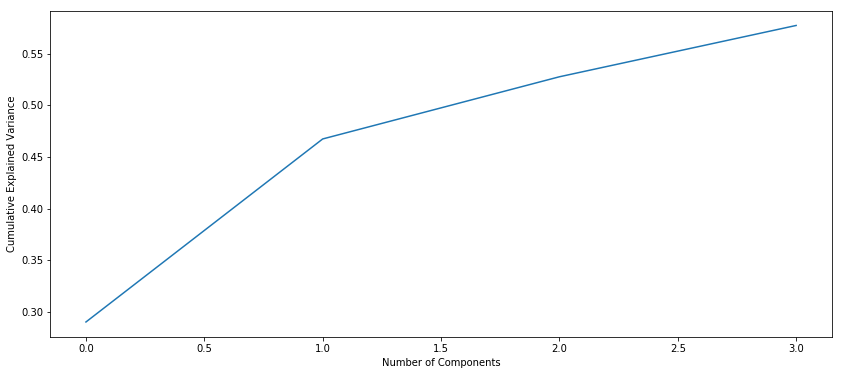

In [25]:
plt.figure(figsize=(14,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

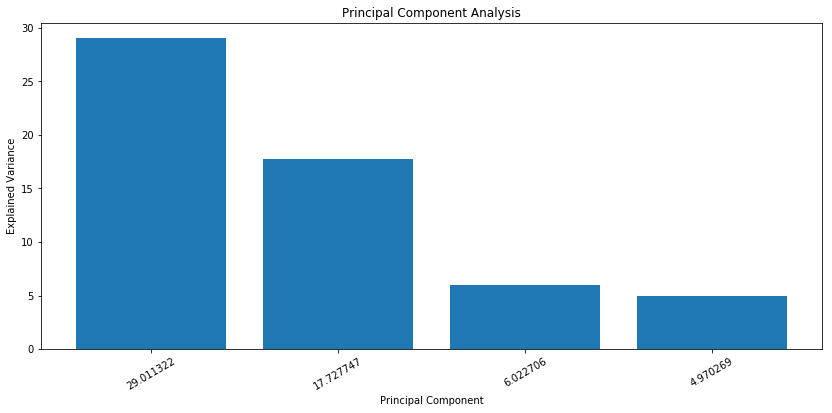

In [26]:
index = np.arange(len(pca.explained_variance_ratio_))
plt.figure(figsize=(14,6))
plt.title('Principal Component Analysis')
plt.bar(index, pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component', fontsize=10)
plt.ylabel('Explained Variance', fontsize=10)
plt.xticks(index, pca.explained_variance_ratio_*100, fontsize=10, rotation=30)
plt.show()

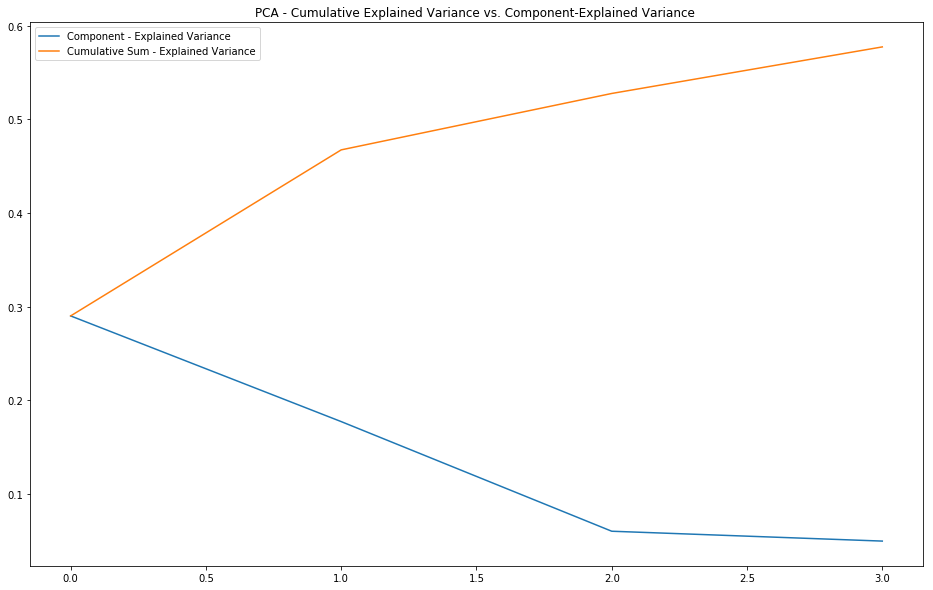

In [27]:
plt.figure(figsize=(16,10))
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA - Cumulative Explained Variance vs. Component-Explained Variance ")
plt.legend(("Component - Explained Variance","Cumulative Sum - Explained Variance"))

In the above graph, the blue line represents component-wise explained variance while the orange line represents the cumulative explained variance. We are able to explain around 60% variance in the dataset using just four components. Let us now try to visualize each of these decomposed components:

/opt/conda/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


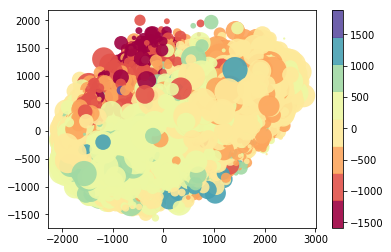

In [28]:
plt.scatter(pca_result[:, 0], pca_result[:, 1],pca_result[:, 2], pca_result[:, 3],
            edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('Spectral', 8))
plt.colorbar();

**Singular Value Decomposition(SVD)**

SVD decomposes the original variables into three constituent matrices. It is essentially used to remove redundant features from the dataset. It uses the concept of Eigenvalues and Eigenvectors to determine those three matrices. 

Let’s implement SVD and decompose our original variables:

In [29]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df[feat_cols].values)
svd.shape

(60000, 3)

Let us visualize the transformed variables by plotting the first three principal components:

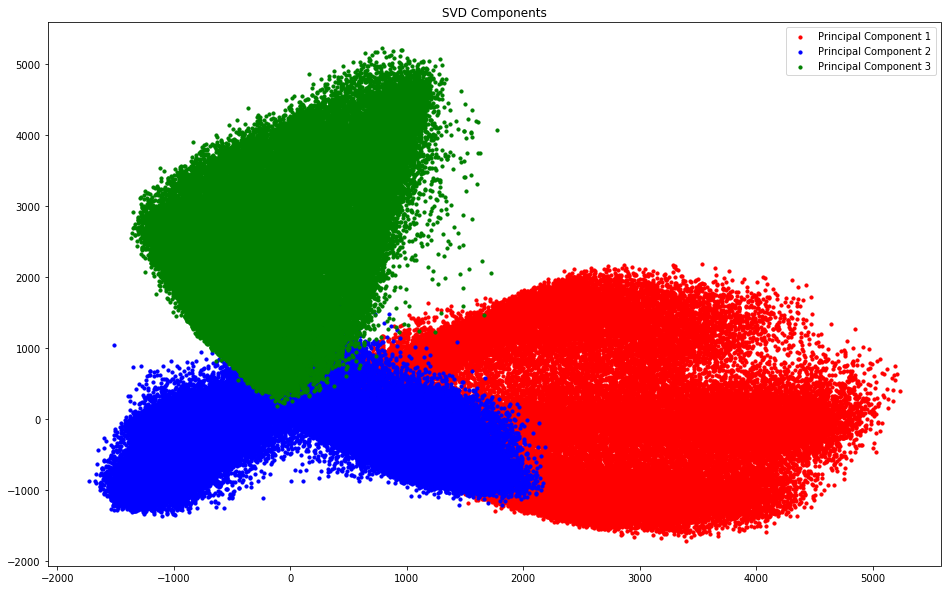

In [30]:
plt.figure(figsize=(16,10))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1],c='r',s=10)
plt.scatter(svd[:,1], svd[:,2],c='b',s=10)
plt.scatter(svd[:,2],svd[:,0],c='g',s=10)
plt.legend(("Principal Component 1","Principal Component 2","Principal Component 3"))

The above scatter plot shows us the decomposed components very neatly. As described earlier, there is not much correlation between these components.

**Independent Component Analysis(ICA)**


Independent Component Analysis (ICA) is based on information-theory and is also one of the most widely used dimensionality reduction techniques. The major difference between PCA and ICA is that PCA looks for uncorrelated factors while ICA looks for independent factors.

If two variables are uncorrelated, it means there is no linear relation between them. If they are independent, it means they are not dependent on other variables. For example, the age of a person is independent of what that person eats, or how much television he/she watches.

This algorithm assumes that the given variables are linear mixtures of some unknown latent variables. It also assumes that these latent variables are mutually independent, i.e., they are not dependent on other variables and hence they are called the independent components of the observed data.

Let’s compare PCA and ICA visually to get a better understanding of how they are different:

<img src="http://i68.tinypic.com/f4oexi.jpg">

Here, image (a) represents the PCA results while image (b) represents the ICA results on the same dataset.

The equation of PCA is x = Wχ.

Here,

x is the observations
W is the mixing matrix
χ is the source or the independent components
Now we have to find an un-mixing matrix such that the components become as independent as possible. Most common method to measure independence of components is Non-Gaussianity:

As per the central limit theorem, distribution of the sum of independent components tends to be normally distributed (Gaussian).
<img src="http://i64.tinypic.com/4j0wp1.jpg">

So we can look for the transformations that maximize the kurtosis of each component of the independent components. Kurtosis is the third order moment of the distribution. To learn more about kurtosis, head over here.
Maximizing the kurtosis will make the distribution non-gaussian and hence we will get independent components.
<img src="http://i63.tinypic.com/aesm5y.jpg">

The above distribution is non-gaussian which in turn makes the components independent. Let’s try to implement ICA in Python:

In [31]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(df[feat_cols].values)

Here, n_components will decide the number of components in the transformed data. We have transformed the data into 3 components using ICA. Let’s visualize how well it has transformed the data:

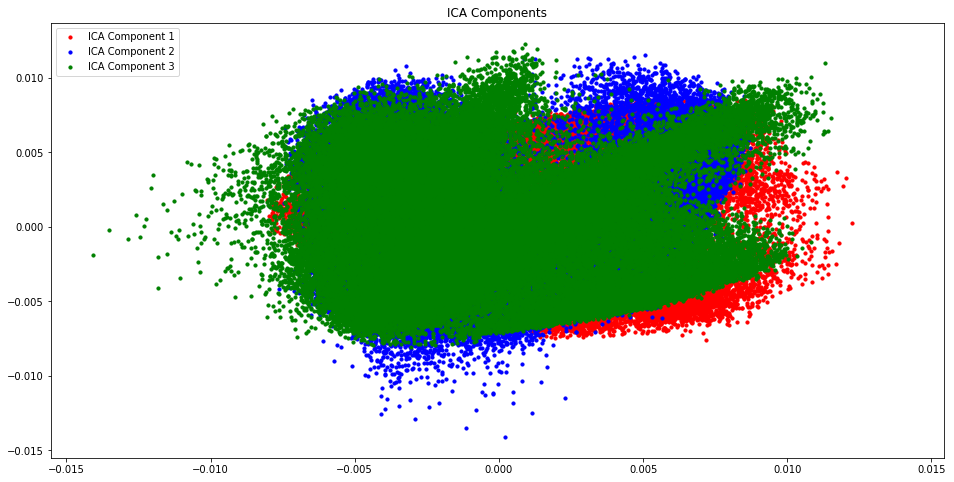

In [32]:
plt.figure(figsize=(16,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1],c='r',s=10)
plt.scatter(X[:,1], X[:,2],c='b',s=10)
plt.scatter(X[:,2], X[:,0],c='g',s=10)
plt.legend(("ICA Component 1","ICA Component 2","ICA Component 3"))

The data has been separated into different independent components which can be seen very clearly in the above image. X-axis and Y-axis represent the value of decomposed independent components.

Now we shall look at some of the methods which reduce the dimensions of the data using projection techniques.

#### 3.2.2 Projections Based

##### ISOMAP

To start off, we need to understand what projection is. Suppose we have two vectors, vector <b>a</b> and vector <b>b</b>, as shown below:

<img src="http://i64.tinypic.com/339msz7.jpg">

We want to find the projection of a on b. Let the angle between vector <b>a</b> and vector <b>b</b> be ∅. The projection (a1) will look like:
<img src="http://i65.tinypic.com/15wfh9h.jpg">

<b>a1</b> is the vector parallel to <b>b</b>. So, we can get the projection of vector a on vector b using the below equation:
<img src="http://i66.tinypic.com/1z35gkz.jpg">

Here,

a1 = projection of a onto b
b̂ = unit vector in the direction of b

By projecting one vector onto the other, dimensionality can be reduced.

In projection techniques, multi-dimensional data is represented by projecting its points onto a lower-dimensional space. Now we will discuss different methods of projections:

Projection onto interesting directions:
- Interesting directions depend on specific problems but generally, directions in which the projected values are non-gaussian are considered to be interesting
- Similar to ICA (Independent Component Analysis), projection looks for directions maximizing the kurtosis of the projected values as a measure of non-gaussianity

*** Projection onto Manifolds:***

Once upon a time, it was assumed that the Earth was flat. No matter where you go on Earth, it keeps looking flat (let’s ignore the mountains for a while). But if you keep walking in one direction, you will end up where you started. That wouldn’t happen if the Earth was flat. The Earth only looks flat because we are minuscule as compared to the size of the Earth.

These small portions where the Earth looks flat are manifolds, and if we combine all these manifolds we get a large scale view of the Earth, i.e., original data. Similarly for an n-dimensional curve, small flat pieces are manifolds and a combination of these manifolds will give us the original n-dimensional curve. Let us look at the steps for projection onto manifolds:

- We first look for a manifold that is close to the data
- Then project the data onto that manifold
- Finally for representation, we unfold the manifold

There are various techniques to get the manifold, and all of these techniques consist of a three-step approach:
    - Collecting information from each data point to construct a graph having data points as vertices
    - Transforming the above generated graph into suitable input for embedding steps
    - Computing an (nXn) eigen equation

Let us understand manifold projection technique with an example.

If a manifold is continuously differentiable to any order, it is known as smooth or differentiable manifold. ISOMAP is an algorithm which aims to recover full low-dimensional representation of a non-linear manifold. It assumes that the manifold is smooth.

It also assumes that for any pair of points on manifold, the geodesic distance (shortest distance between two points on a curved surface) between the two points is equal to the Euclidean distance (shortest distance between two points on a straight line). Let’s first visualize the geodesic and Euclidean distance between a pair of points:
<img src="http://i64.tinypic.com/64gpea.jpg">

Here,

- Dn1n2 = geodesic distance between X1 and X2
- dn1n2 = Euclidean distance between X1 and X2

ISOMAP assumes both of these distances to be equal. Let’s now look at a more detailed explanation of this technique. As mentioned earlier, all these techniques work on a three-step approach. We will look at each of these steps in detail:

- Neighborhood Graph:
First step is to calculate the distance between all pairs of data points:
dij = dχ(xi,xj) = || xi-xj || χ
Here,
    - dχ(xi,xj) = geodesic distance between xi and xj
    - || xi-xj || = Euclidean distance between xi and xj
    - After calculating the distance, we determine which data points are neighbors of manifold
    - Finally the neighborhood graph is generated: G=G(V,ℰ), where the set of vertices V = {x1, x2,…., xn} are input data points and set of edges ℰ = {eij} indicate neighborhood relationship between the points
    
- Compute Graph Distances:
    - Now we calculate the geodesic distance between pairs of points in manifold by graph distances
    - Graph distance is the shortest path distance between all pairs of points in graph G
- Embedding:
    - Once we have the distances, we form a symmetric (nXn) matrix of squared graph distance
    - Now we choose embedding vectors to minimize the difference between geodesic distance and graph distance
    - Finally, the graph G is embedded into Y by the (t Xn) matrix

Let’s implement it in Python and get a clearer picture of what I’m talking about. We will perform non-linear dimensionality reduction through Isometric Mapping. For visualization, we will only take a subset of our dataset as running it on the entire dataset will require a lot of time.

In [33]:
from sklearn import manifold 
trans_data = manifold.Isomap(n_neighbors=5, n_components=3, n_jobs=-1).fit_transform(df[feat_cols][:6000].values)

Parameters used:

- n_neighbors decides the number of neighbors for each point
- n_components decides the number of coordinates for manifold
- n_jobs = -1 will use all the CPU cores available

Visualizing the transformed data:

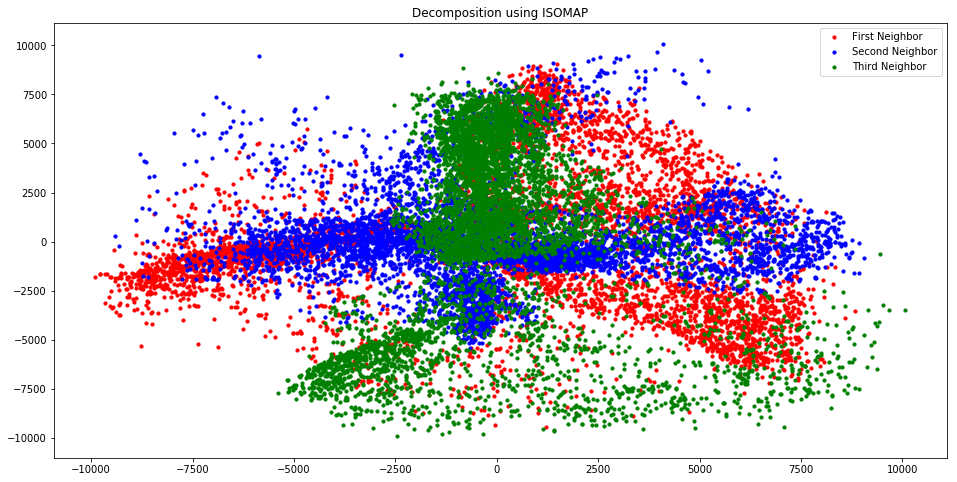

In [34]:
plt.figure(figsize=(16,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1],c='r',s=10)
plt.scatter(trans_data[:,1], trans_data[:,2],c='b',s=10)
plt.scatter(trans_data[:,2], trans_data[:,0],c='g',s=10)
plt.legend(("First Neighbor","Second Neighbor","Third Neighbor"))

You can see above that the correlation between these components is very low. In fact, they are even less correlated as compared to the components we obtained using SVD earlier!

##### t-Distributed Stochastic Neighbor Embedding (t-SNE)
So far we have learned that PCA is a good choice for dimensionality reduction and visualization for datasets with a large number of variables. But what if we could use something more advanced? What if we can easily search for patterns in a non-linear way? t-SNE is one such technique. There are mainly two types of approaches we can use to map the data points:

    - Local approaches :  They maps nearby points on the manifold to nearby points in the low dimensional representation.
    - Global approaches : They attempt to preserve geometry at all scales, i.e. mapping nearby points on manifold to nearby points in low dimensional representation as well as far away points to far away points.

- t-SNE is one of the few algorithms which is capable of retaining both local and global structure of the data at the same time
- It calculates the probability similarity of points in high dimensional space as well as in low dimensional space
- High-dimensional Euclidean distances between data points are converted into conditional probabilities that represent similarities:

<img src="http://i65.tinypic.com/1zlem8i.jpg">

xi and xj are data points, ||xi-xj|| represents the Euclidean distance between these data points, and 𝛔i is the variance of data points in high dimensional space
- For the low-dimensional data points yi and yj corresponding to the high-dimensional data points xi and xj, it is possible to compute a similar conditional probability using:
<img src="http://i63.tinypic.com/23to1n6.jpg">

where ||yi-yj|| represents the Euclidean distance between yi and yj
- After calculating both the probabilities, it minimizes the difference between both the probabilities

We will now implement it in Python and visualize the outcomes:

In [35]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, n_iter=300).fit_transform(df[feat_cols][:6000].values)

n_components will decide the number of components in the transformed data. Time to visualize the transformed data:

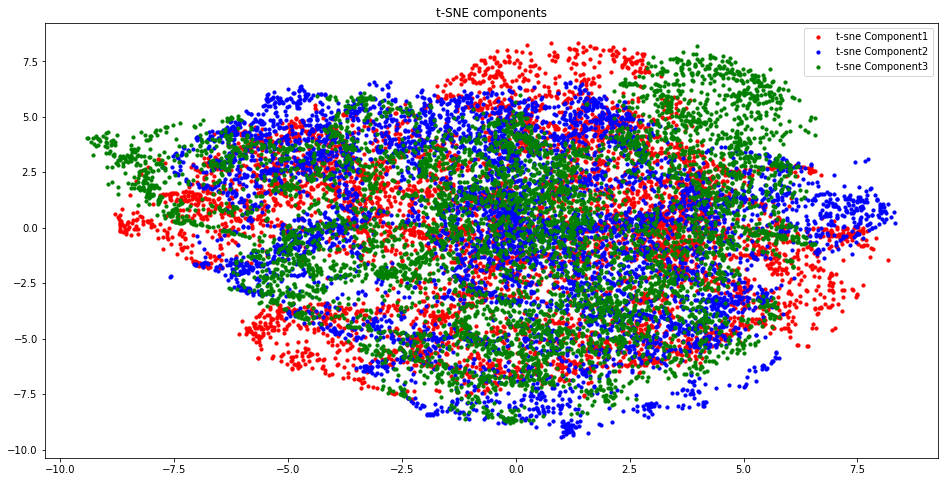

In [36]:
plt.figure(figsize=(16,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1],c='r',s=10)
plt.scatter(tsne[:,1], tsne[:,2],c='b',s=10)
plt.scatter(tsne[:,2], tsne[:,0],c='g',s=10)
plt.legend(("t-sne Component1","t-sne Component2","t-sne Component3"))

Here you can clearly see the different components that have been transformed using the powerful t-SNE technique.

##### Uniform Manifold Approximation and Projection (UMAP) 

t-SNE works very well on large datasets but it also has it’s limitations, such as loss of large-scale information, slow computation time, and inability to meaningfully represent very large datasets. Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can preserve as much of the local, and more of the global data structure as compared to t-SNE, with a shorter runtime. Sounds intriguing, right?

Some of the key advantages of UMAP are:

   - It can handle large datasets and high dimensional data without too much difficulty
   - It combines the power of visualization with the ability to reduce the dimensions of the data
   - Along with preserving the local structure, it also preserves the global structure of the data. UMAP maps nearby points on the manifold to nearby points in the low dimensional representation, and does the same for far away points.

This method uses the concept of k-nearest neighbor and optimizes the results using stochastic gradient descent. It first calculates the distance between the points in high dimensional space, projects them onto the low dimensional space, and calculates the distance between points in this low dimensional space. It then uses Stochastic Gradient Descent to minimize the difference between these distances. To get a more in-depth understanding of how UMAP works, check out this paper.

We will now implement it in Python:

In [37]:
import umap

In [38]:
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(df[feat_cols][:6000].values)

Here,

- n_neighbors determines the number of neighboring points used
- min_dist controls how tightly embedding is allowed. Larger values ensure embedded points are more evenly distributed

Let us visualize the transformation:

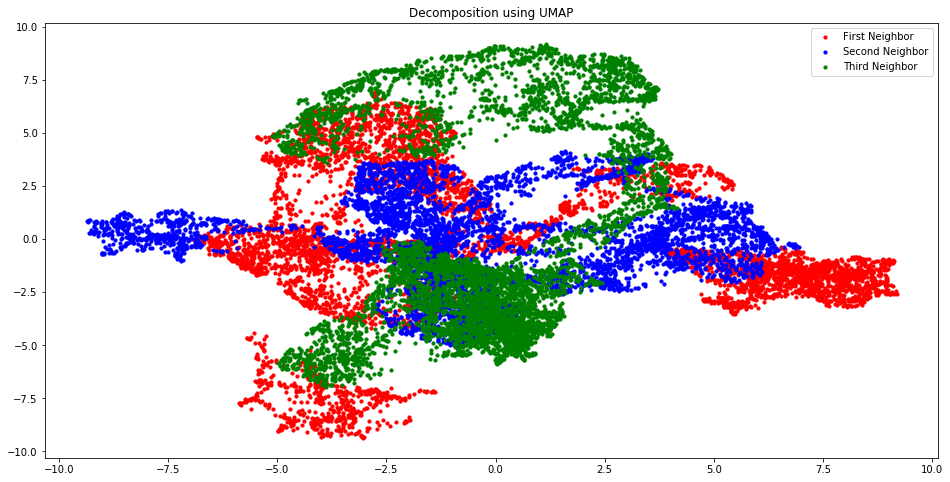

In [39]:
plt.figure(figsize=(16,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1],c='r',s=10)
plt.scatter(umap_data[:,1], umap_data[:,2],c='b',s=10)
plt.scatter(umap_data[:,2], umap_data[:,0],c='g',s=10)
plt.legend(("First Neighbor","Second Neighbor","Third Neighbor"))

The dimensions have been reduced and we can visualize the different transformed components. There is very less correlation between the transformed variables.We can see that the correlation between the components obtained from UMAP is quite less as compared to the correlation between the components obtained from t-SNE. Hence, UMAP tends to give better results.

# If you like this kernel Greatly Appreciate if you can UPVOTE .Thank you